<h1 style="text-align: center;">Desafío - Dimensionalidad y Agrupación II</h1>

- Para realizar este desafío debes haber estudiado previamente todo el material disponible correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo del desafío: individual
- Para la realización del desafío necesitarás apoyarte del archivo `Apoyo Desafío - Dimensionalidad y agrupación (II)`, disponible en la <a href="https://empieza.desafiolatam.com/cohorts/2091/sections/78293/activities/119122/items/610965">plataforma</a>.

## Desafío 1: Preparación del ambiente de trabajo
- Para este desafío trabajaremos de manera conjunta identificando la paleta de colores de carátulas de álbumes.
    - Las imágenes se encuentran en una carpeta con el nombre `album_covers`.
    - Cada imagen tiene la siguiente nomenclatura: `artista-nombre-del-album.jpg`.
<br />
<br />

- El objetivo es generar un método que nos permita identificar la dominancia de una cantidad finita de colores.
- Para importar imágenes y visualizarlas, vamos a importar las siguientes librerías:
    - Comencemos por incluír las librerías clásicas: `pandas`, `numpy` y `matplotlib.pyplot`.
    - `sklearn.cluster.KMeans`: para extraer los principales componentes de una matriz numérica.
    - `skimage.io`: Para poder ingresar y leer imágenes.

In [1]:
# Utiliza esta celda para importar los módulos solicitados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans
from skimage import io

import time # Para medir el tiempo

## Desafío 2: Importación de imágenes
- Comencemos por ingresar una imagen a nuestro ambiente de trabajo. Para ello ocuparemos `io.imread`.

In [2]:
# Utiliza esta celda para leer la imagen y mostrar su tipo y dimensiones
imgn = io.imread('album_covers/alt-j-this-is-all-yours.jpg')
print('Tipo:\t', type(imgn))
print('Shape:\t', imgn.shape)

Tipo:	 <class 'numpy.ndarray'>
Shape:	 (1500, 1500, 3)


**¿Qué devuelve?** Devuelve un objeto de tipo ndarray, de 3 dimensiones, las cuales son alto de la imagen (cantidad de pixeles), ancho de la imagen (cantidad de pixeles) y el color en RGB (rojo, verde y azul)

- Para visualizar la imágen en el notebook, ocupe io.imshow.

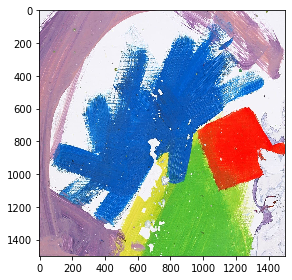

In [3]:
# Utiliza esta celda para visualizar la imagen
io.imshow(imgn);

## Desafío 3: Preprocesamiento de imágenes y KMeans
- Con la representación numérica de la imágen, vamos a extraer la altura, el ancho y la cantidad de canales mediante `shape`.

In [4]:
# Utiliza esta celda para almacenar h, w y dims desde imgn.shape
h, w, dims = imgn.shape

- Posteriormente redimensionaremos la imágen con reshape.

In [5]:
# Utiliza esta celda para redimensionar la imagen de forma imgn.reshape(h * w, dims) y generar así un DataFrame de 2 dimensiones

# Generar DataFrame de 2 dimensiones:
#    - Cada fila es un pixel, por ende la cantidad de registros corresponde a la cantidad de pixeles (ancho x alto de la imagen).
#    - Cada pixel, por ende cada fila, tiene 3 canales que forman el color (RGB), por ende 3 columnas

df = pd.DataFrame(imgn.reshape(h*w, dims))
df.head()

,0,1,2
0,239,238,244
1,239,238,244
2,239,238,244
3,239,238,244
4,239,238,244


In [6]:
df.shape

(2250000, 3)

- Partamos por inicializar nuestro algoritmo `KMeans` con un $k=8$

In [7]:
# Utiliza esta celda para disponer la imagen en 8 clusters principales. NOTA: Al ser no supervisado, no se divide la muestra
clf_km = KMeans(n_clusters = 8) 
clf_km.fit(df)

KMeans()

**¿Qué significa esto?**

**Respuesta**: quiere decir que se han generado 8 grupos o clusters de pixeles, donde cada pixel de la imagen se ha asignado a alguno de ellos. El centroide de cada grupo, corresponde al "color promedio" de los pixeles que pertenecen al cluster del centroide.

In [8]:
# Implementamos el minibatch

cls_mbkm = MiniBatchKMeans(n_clusters = 8)
cls_mbkm.fit(df)

MiniBatchKMeans()

**¿Qué diferencia existe con KMeans?**

Basicamente, k-means ocupa todo el conjunto de datos en la memoria principal para calcular los clusters, por lo que el costo aumenta mucho a medida que el volumen de la data aumenta. En cambio, Mini Batch K-means utiliza pequeños lotes aleatorios de datos de un tamaño fijo, para que puedan almacenarse en la memoria, con el fin de reducir el costo.

Si nos vamos a la práctica, para k-means el proceso demoró 39 segundos aproximadamente, en cambio, con miniBatch se demoro solo 11 segundos.

## Desafío 4: Extracción de valores
- Ahora extraemos las etiquetas predichas con `labels_`. Hasta el momento las etiquetas hacen referencia a cada centroide.

In [9]:
# Utiliza esta celda para ver posibles etiquetas únicas con np.unique
np.unique(clf_km.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7])

- Para imputar sentido en estos, debemos extraer los valores de los centroides.
- Para extraer los centroides (valores característicos), utilizamos el atributo `cluster_centers_`.

In [10]:
# Utiliza esta celda para explorar valores de canales de colores (columnas) de cada centroide generado utilizando cluster_centers_
centroides = pd.DataFrame(clf_km.cluster_centers_)
centroides

,0,1,2
0,236.424143,237.584418,243.348266
1,17.840266,94.242672,184.115523
2,204.597072,215.164664,76.111928
3,148.381466,115.043950,152.810617
4,241.616043,37.065648,12.841896
5,97.234331,191.276600,55.596722
6,186.235717,148.147127,172.748644
7,86.306769,150.920253,208.468350


- Con las etiquetas, generamos un conteo de ocurrencia con `np.unique`. Para extraer el conteo, debemos implementar la opción `return_counts=True`.

In [11]:
# Utiliza esta celda para explorar las frecuencias de cada centroide utilizando np.unique(labels_, return_counts= True)
center_id, counts = np.unique(clf_km.labels_, return_counts= True)
pd.DataFrame({'center_id':center_id, 'counts':counts})

,center_id,counts
0,0,611900
1,1,539608
2,2,90332
3,3,206474
4,4,149403
5,5,246518
6,6,331316
7,7,74449


con esto, obtenemos la cantidad de registros que hay en cada clusters

## Desafío 5: Conversión rgb a hex
- Con los centroides, vamos a convertirlos a formato hexadecimal.
- Vamos a generar una función y la pasaremos con map por cada centroide.

In [12]:
# Función que transforma una lista de canales rgb a string hexadecimal de color
def rgb_to_hex(rgb):
    return '#{:02x}{:02x}{:02x}'.format(rgb[0], rgb[1], rgb[2])

In [13]:
# Utiliza esta celda para transformar canales de centroides RGB a strings hexadecimal. Tip: Usar cluster_centers_.astype(int)
hex_centers = list(map(lambda x: rgb_to_hex(x), clf_km.cluster_centers_.astype(int)))
hex_centers

['#ecedf3',
 '#115eb8',
 '#ccd74c',
 '#947398',
 '#f1250c',
 '#61bf37',
 '#ba94ac',
 '#5696d0']

## Desafío 6: Definición de base
- Ahora generamos un DataFrame con las siguientes variables:
    - El color `hex` (generado en ejercicio anterior).
    - La ocurrencia del color en cada pixel count (generado al final del ejercicio 4).
    - El porcentaje de ocurrencia de cada color respecto a `cluster_centers_` (`counts/counts.sum()`).

- Posteriormente ordenaremos los colores de forma descendente por el porcentaje de ocurrencia.

In [14]:
# Utiliza esta celda para generar DF con porcentaje para cada color hexadecimal y ordenar
df_hex = pd.DataFrame({'hex_id':hex_centers,
                       'percentage': counts/counts.sum()})
df_hex.sort_values(by='percentage', ascending=False, inplace=True)
df_hex

,hex_id,percentage
0,#ecedf3,0.271956
1,#115eb8,0.239826
6,#ba94ac,0.147252
5,#61bf37,0.109564
3,#947398,0.091766
4,#f1250c,0.066401
2,#ccd74c,0.040148
7,#5696d0,0.033088


## Desafío 7: Visualización

- Genere un gráfico de barras donde presente el porcentaje de cada color.
- Las barras deben estar coloreadas con el color inferido.

<BarContainer object of 8 artists>

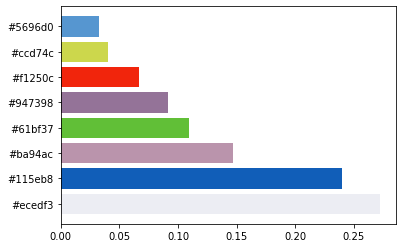

In [15]:
# Utiliza esta celda para generar el gráfico solicitado de la forma plt.barh(df_hex.hex_id, df_hex.percentage, color=df_hex.hex_id)
plt.barh(df_hex.hex_id, df_hex.percentage, color=df_hex.hex_id)

## Bonus point: Envuelva todo en una función

In [16]:
# Definir función que engloba todo el proceso
def plot_kmeans_colors(img_path, n_centers=8):
    imgn = io.imread(img_path)
    h, w, dims = imgn.shape
    clf_km = KMeans(n_clusters = n_centers).fit(imgn.reshape(h*w, dims))
    center_id, counts = np.unique(clf_km.labels_, return_counts= True)
    hex_centers = list(map(lambda x: rgb_to_hex(x), clf_km.cluster_centers_.astype(int)))
    
    df_hex = pd.DataFrame({'hex_id':hex_centers, 'percentage': counts/counts.sum()})
    df_hex = df_hex.sort_values(by='percentage', ascending=False)
    
    fig = plt.figure()
    fig.set_size_inches(12,4)
    plt.subplot(1,2,1)
    plt.imshow(imgn)
    plt.subplot(1,2,2)
    plt.barh(df_hex.hex_id, df_hex.percentage, color=df_hex.hex_id, edgecolor='k')
    plt.tight_layout()
    plt.show()

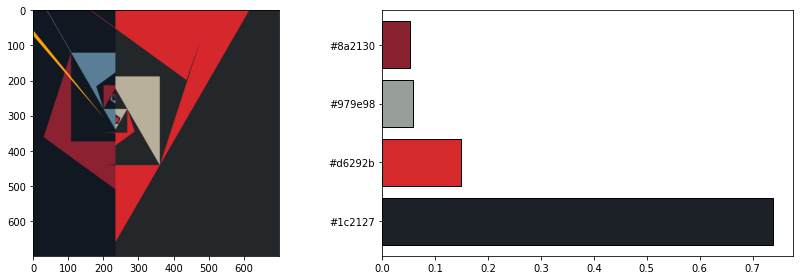

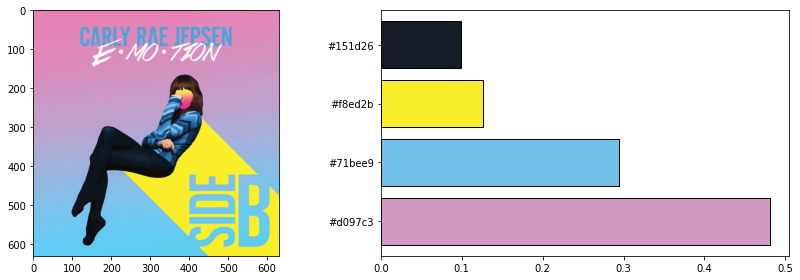

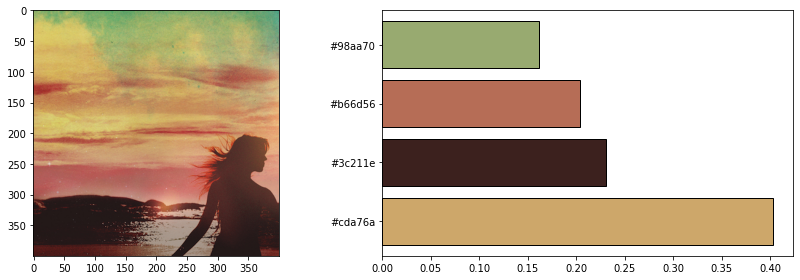

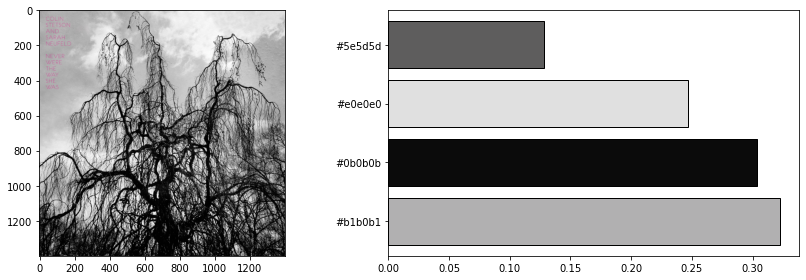

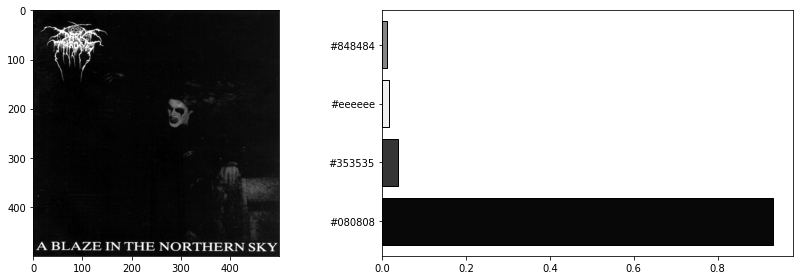

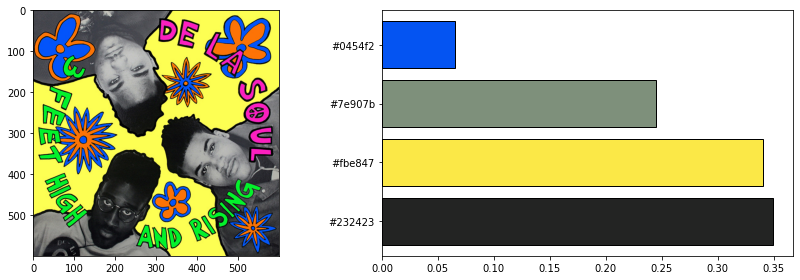

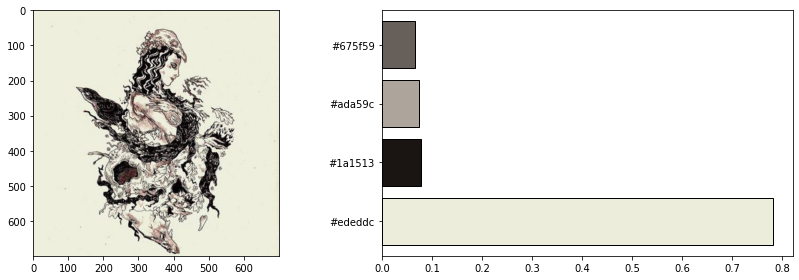

In [17]:
# Llamar a la función para algunas carátulas
from glob import glob

for caratula in glob('album_covers/*.jpg')[6:13]:
    #print(caratula)
    plot_kmeans_colors(caratula, 4)